In [2]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [2]:
!pip3 install pandas==1.0.5

In [8]:
import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [6]:
#Import the necessary Libraries
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [5]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving youtube_data.zip to youtube_data (1).zip


In [19]:
#Unzipping the dataset
!unzip /content/youtube_data.zip

Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  
  inflating: __MACOSX/youtube_data/._USvide

In [9]:
# Storing data in 4 separate dataframes based on their country specific video file
import io
df1=pd.read_csv('youtube_data/INvideos.csv')
df2=pd.read_csv('youtube_data/CAvideos.csv')
df3=pd.read_csv('youtube_data/FRvideos.csv')
df4=pd.read_csv('youtube_data/USvideos.csv')

In [12]:
#Dropping the null values in the dataframe
df1.dropna(subset = ["description"], inplace=True)
df2.dropna(subset = ["description"], inplace=True)
df3.dropna(subset = ["description"], inplace=True)
df4.dropna(subset = ["description"], inplace=True)

In [11]:
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

['/content/youtube_data/CAvideos.csv',
 '/content/youtube_data/FRvideos.csv',
 '/content/youtube_data/INvideos.csv',
 '/content/youtube_data/USvideos.csv']

In [10]:
#Adding a new column called country to all the four dataframes
# Storing the respective country name in the country column
df4['Country']='US'
df3['Country']='France'
df2['Country']='Canada'
df1['Country']='India'
all_dataframes = [df1,df2,df3,df4]

In [13]:
#Concatenating all dataframes into one
#Setting the video id as the index
combined_data = pd.concat(all_dataframes)
combined_data.set_index('video_id')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,India
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


In [14]:
#converting the category id column data into string values
combined_data['category_id'] = combined_data['category_id'].astype(str)

In [15]:
# Opening and reading the content of the Json file
with open("youtube_data/IN_category_id.json") as a:
  data1 = json.load(a)
#print(data1)
with open("youtube_data/FR_category_id.json") as b:
  data2 = json.load(b)
#print(data2)
with open("youtube_data/US_category_id.json") as c:
  data3 = json.load(c)
#print(data3)
with open("youtube_data/CA_category_id.json") as d:
  data4 = json.load(d)
#print(data4)

In [16]:
# Storing all json files into a list
Json_data = [data1,data2,data3,data4]
print(Json_data)

[{'kind': 'youtube#videoCategoryListResponse', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'you

In [45]:
# Adding a prefix 'items' to the data columns
df = pd.json_normalize(Json_data, 'items', ['kind', 'etag'],record_prefix='items_')
df['items_snippet.title']

0      Film & Animation
1      Autos & Vehicles
2                 Music
3        Pets & Animals
4                Sports
             ...       
120      Sci-Fi/Fantasy
121            Thriller
122              Shorts
123               Shows
124            Trailers
Name: items_snippet.title, Length: 125, dtype: object

In [46]:
# Dropping duplicates and storing the data in category_name
# setting items_id as the index
category_name = combined_data['category_id'].map(df.drop_duplicates('items_id').set_index('items_id')['items_snippet.title'])

In [47]:
# Insert new category and converting the publish_time to pandas datetime format
combined_data.insert(4, 'category', category_name)
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'])
print('validate_na',(combined_data.shape))

validate_na (154567, 18)


In [34]:
combined_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country'],
      dtype='object')

In [35]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
std,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [17]:
# Max,Min,Standard deviation and mean values of views,likes,dislikes and comment_count
views_max = combined_data['views'].max()
views_min = combined_data['views'].min()
views_std = combined_data['views'].std()
views_mean = combined_data['views'].mean()
likes_max = combined_data['likes'].max()
likes_min = combined_data['likes'].min()
likes_std = combined_data['likes'].std()
likes_mean = combined_data['likes'].mean()
dislikes_mean = combined_data['dislikes'].mean()
dislikes_std = combined_data['dislikes'].std()
dislikes_min = combined_data['dislikes'].min()
dislikes_max = combined_data['dislikes'].max()

comment_count_max = combined_data['comment_count'].max()
comment_count_min = combined_data['comment_count'].min()
comment_count_std = combined_data['comment_count'].std()
comment_count_mean = combined_data['comment_count'].mean()

In [18]:
# Adding all maxs to a list
# Likewise adding all min, std and mean values to separate lists
# Print the min, max,std and mean in a list
maxs = [views_max,likes_max,dislikes_max,comment_count_max]
mins = [views_min,likes_min,dislikes_min,comment_count_min]
stds = [views_std,likes_std,dislikes_std,comment_count_std]
means = [views_mean,likes_mean,dislikes_mean,comment_count_mean]


print('check_min_max_mean_std',([maxs, mins, stds, means]))

check_min_max_mean_std [[225211923, 5613827, 1643059, 1228655], [223, 0, 0, 0], [4605292.478385801, 152148.95485475037, 18258.54137966117, 23278.22562061912], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


In [19]:
# Adding +1 before connverting to log values as the min value is above log0
combined_data["views"] = combined_data["views"] + 1
combined_data["likes"] = combined_data["likes"] + 1
combined_data["dislikes"] = combined_data["dislikes"] + 1
combined_data["comment_count"] = combined_data["comment_count"] + 1



combined_data['views_log'] = np.log(combined_data['views'])
combined_data['likes_log'] = np.log(combined_data['likes'])
combined_data['dislikes_log'] = np.log(combined_data['dislikes'])
combined_data['comment_log'] = np.log(combined_data['comment_count'])

print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188683, 12.55267980501314, 5.614484952081131, 6.424543615108467]


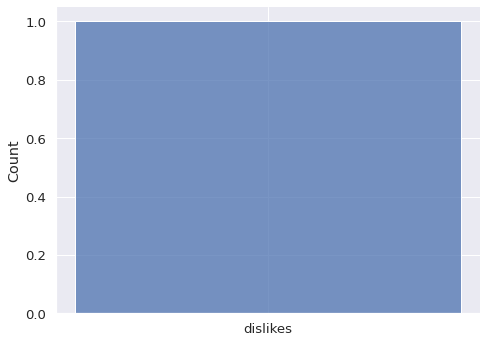

In [51]:
#Dropping duplicates
combined_data.index.is_unique
combined_data.drop_duplicates(keep='first').shape
combined_data.index.duplicated()
combined_data = combined_data.loc[combined_data.index.duplicated(),:]
combined_data = combined_data.drop_duplicates(keep='first')


import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

sns.displot(x=['dislikes'],kind='kde',aspect=1.4,bins=20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


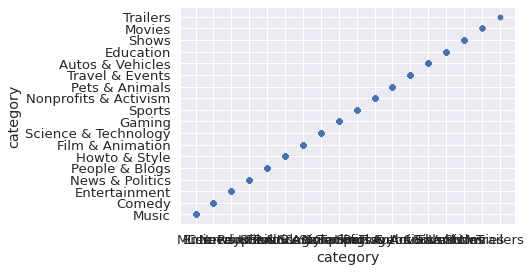

In [55]:
#Storing the category value count in video_count 
# Scatter plot to show the category vallue count
video_count = combined_data['category'].value_counts()

video_categories = combined_data.plot(kind='scatter',x = 'category', y = 'category')

In [56]:
video_count

Entertainment            31060
Music                    13573
People & Blogs           11146
Comedy                   11039
News & Politics           9115
Sports                    8468
Howto & Style             8209
Film & Animation          6029
Science & Technology      4182
Gaming                    3333
Education                 3283
Pets & Animals            1468
Autos & Vehicles          1314
Travel & Events            844
Shows                      265
Nonprofits & Activism      232
Movies                      11
Trailers                     2
Name: category, dtype: int64

In [34]:
# Storing the length of the title and the description in separat columns as a string value
combined_data['len_title'] = combined_data['title'].str.len()
combined_data['desc_len'] = combined_data['description'].str.len()


tags_count = combined_data['tags'].str.split('|')
combined_data['num_tags'] = combined_data['tags'].str.len()

In [58]:
combined_data['num_tags']

0         61
1        121
2        314
3        120
4        103
        ... 
40876    408
40877    396
40878    542
40879    223
40880      6
Name: num_tags, Length: 113573, dtype: int64

In [59]:
print('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description [count    113573.000000
mean        256.975170
std         170.732195
min           2.000000
25%         104.000000
50%         233.000000
75%         422.000000
max         730.000000
Name: num_tags, dtype: float64, count    113573.000000
mean        967.883731
std         868.051020
min           1.000000
25%         360.000000
50%         726.000000
75%        1298.000000
max        5260.000000
Name: desc_len, dtype: float64, count    113573.000000
mean         51.860319
std          21.235022
min           2.000000
25%          36.000000
50%          49.000000
75%          66.000000
max         100.000000
Name: len_title, dtype: float64]


In [75]:
#converting the publsh_time and publish_date to pandas datetime format
combined_data['publsh_time'] = pd.to_datetime(combined_data['publish_time']).dt.time
combined_data['publish_date'] = pd.to_datetime(combined_data['publish_time']).dt.date

In [71]:
combined_data.dtypes

video_id                   object
trending_date               int64
title                      object
channel_title               int64
category_id                object
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                 int64
Country                     int64
views_log                 float64
likes_log                 float64
dislikes_log              float64
comment_log               float64
len_title                   int64
desc_len                    int64
num_tags                    int64
publsh_time                object
publish_date               object
dtype: object

In [63]:
combined_data

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags,publsh_time,publish_date
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158580,787426,43421,125883,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,16.658009,13.576525,10.678698,11.743108,42,594,61,17:00:03,2017-11-10
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014652,127795,1689,13031,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada,13.830056,11.758183,7.431892,9.475086,29,704,121,17:00:00,2017-11-13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191435,146036,5340,8182,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,14.975981,11.891608,8.582981,9.009692,53,1177,314,19:05:24,2017-11-12
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095829,132240,1990,17519,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada,14.555460,11.792374,7.595890,9.771041,24,636,120,18:01:41,2017-11-12
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523623,1634131,21083,85068,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada,17.327761,14.306622,9.956222,11.351206,43,1250,103,11:04:14,2017-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,Tn8hOPeAnIM,18.14.06,Erika Costell - Chitty Bang ft. Jake Paul (Off...,Erika Costell,People & Blogs,22,2018-05-29 21:00:01+00:00,"erika costell|""team 10""|""erika team 10""|""erika...",7854613,185633,104832,52365,https://i.ytimg.com/vi/Tn8hOPeAnIM/default.jpg,False,False,False,The official music video for Chitty Bang! List...,US,15.876612,12.131527,11.560114,10.865994,64,823,408,21:00:01,2018-05-29
40877,nLXCutcsoKQ,18.14.06,'Roseanne' Cast and Crew React to Cancellation...,Entertainment Tonight,Entertainment,24,2018-05-30 03:13:23+00:00,"sara gilbert|""roseanne""|""et""|""etonline""|""rosea...",1071031,4620,1839,7388,https://i.ytimg.com/vi/nLXCutcsoKQ/default.jpg,False,False,False,Sara Gilbert tweeted her thoughts before ABC a...,US,13.884132,8.438150,7.516977,8.907612,51,149,396,03:13:23,2018-05-30
40878,tsM6kq-7nmw,18.14.06,Does LeBron need a 4th title to pass Jordan as...,Skip and Shannon: UNDISPUTED,Sports,17,2018-05-30 17:01:39+00:00,"fox|""fox sports""|""fs1""|""fox sports 1""|""undispu...",787518,6421,1941,8125,https://i.ytimg.com/vi/tsM6kq-7nmw/default.jpg,False,False,False,"Rob Parker joins Skip Bayless, Shannon Sharpe ...",US,13.576642,8.767329,7.570959,9.002701,75,1759,542,17:01:39,2018-05-30
40879,bR1d8l92Q8Q,18.14.06,Maggie Rogers - Fallingwater,MaggieRogersVEVO,Music,10,2018-05-30 13:00:03+00:00,"maggie rogers fallingwater|""fallingwater maggi...",483083,12661,327,727,https://i.ytimg.com/vi/bR1d8l92Q8Q/default.jpg,False,False,False,Download or stream ‘Fallingwater’ by Maggie Ro...,US,13.087944,9.446282,5.789960,6.588926,28,1615,223,13:00:03,2018-05-30


In [77]:
combined_data['publish_weekday']= pd.to_datetime(combined_data['publish_time']).dt.dayofweek

In [66]:
#Identifying the publish_weekday value count and storing it in video_weekday
video_weekday = combined_data['publish_weekday'].value_counts()
video_weekday

4    19516
3    17458
2    16857
1    16686
0    16182
6    14006
5    12868
Name: publish_weekday, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


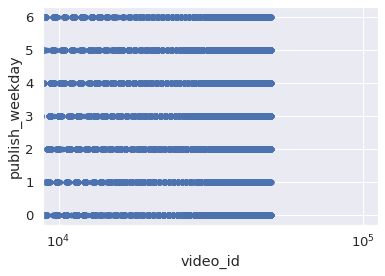

In [67]:
# Scatter plot to show the videos and which day of the week it was published
video_day = combined_data.plot(kind='scatter',x = 'video_id', y = 'publish_weekday')
plt.xscale("log")
plt.show()

In [68]:
# Converting the columns to category type
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.Country = combined_data.Country.astype('category')

In [70]:
pd.get_dummies(combined_data.Country)

,Canada,France,US
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
40876,0,0,1
40877,0,0,1
40878,0,0,1
40879,0,0,1


In [71]:
#deleting a few columns 
del combined_data['title']
del combined_data['views']
del combined_data['likes']
del combined_data['dislikes']
del combined_data['thumbnail_link']
del combined_data['comment_count']
del combined_data['tags']
del combined_data['publish_time']

In [72]:
one_hot_encoded = pd.get_dummies(combined_data, columns = ['Country'])
one_hotencoded = pd.get_dummies(combined_data, columns = ['channel_title'])

In [78]:
# Using label encoder, converting the values of the columns into numeric values
cat_country = combined_data['Country']
values = array(cat_country)
print(cat_country)
label_encoder = LabelEncoder()
combined_data['Country']=label_encoder.fit_transform(values)
print(combined_data['Country'])

0        2
1        2
2        2
3        2
4        2
        ..
40943    3
40944    3
40946    3
40947    3
40948    3
Name: Country, Length: 154567, dtype: int64
0        2
1        2
2        2
3        2
4        2
        ..
40943    3
40944    3
40946    3
40947    3
40948    3
Name: Country, Length: 154567, dtype: int64


In [79]:
cat_trending_date = combined_data['trending_date']
values = array(cat_trending_date)
print(cat_trending_date)
label_encoder = LabelEncoder()
combined_data['trending_date'] =label_encoder.fit_transform(values)
print(combined_data['trending_date'])

0         13
1         13
2         13
3         13
4         13
        ... 
40943    123
40944    123
40946    123
40947    123
40948    123
Name: trending_date, Length: 154567, dtype: int64
0         13
1         13
2         13
3         13
4         13
        ... 
40943    123
40944    123
40946    123
40947    123
40948    123
Name: trending_date, Length: 154567, dtype: int64


In [64]:
cat_channel_title = combined_data['channel_title']
values = array(cat_trending_date)
print(cat_channel_title)
label_encoder = LabelEncoder()
combined_data['channel_title'] =label_encoder.fit_transform(values)
print(combined_data['channel_title'])

0                 Lokdhun Punjabi
1                         HJ NEWS
2                            TFPC
3                     Eruma Saani
4                      Filmylooks
                   ...           
40943              BuzzFeed Celeb
40944               AaronsAnimals
40946                  Brad Mondo
40947    How It Should Have Ended
40948                Call of Duty
Name: channel_title, Length: 154567, dtype: object
0         13
1         13
2         13
3         13
4         13
        ... 
40943    123
40944    123
40946    123
40947    123
40948    123
Name: channel_title, Length: 154567, dtype: int64


In [65]:
cat_description = combined_data['description']
values = array(cat_description)
print(cat_description)
label_encoder = LabelEncoder()
combined_data['description'] =label_encoder.fit_transform(values)
print(combined_data['description'])

0        Presenting Sharry Mann latest Punjabi Song  Cu...
1        पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...
2        Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3        This video showcases the difference between pe...
4        why Samantha became EMOTIONAL @ Samantha naga ...
                               ...                        
40943    BTS with the PPS, the puppies. These adorable ...
40944       The Cat Who Caught the Laser - Aaron's Animals
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 154567, dtype: object
0        34244
1        56113
2        49390
3        44542
4        53318
         ...  
40943     6426
40944    42604
40946    19452
40947    19063
40948     8639
Name: description, Length: 154567, dtype: int64


In [80]:
cat_publsh_time = combined_data['publsh_time']
values = array(cat_publsh_time)
print(cat_publsh_time)
label_encoder = LabelEncoder()
combined_data['publsh_time'] =label_encoder.fit_transform(values)
print(combined_data['publsh_time'])

0        12:20:39
1        05:43:56
2        15:48:08
3        07:08:48
4        01:14:16
           ...   
40943    16:39:29
40944    13:00:04
40946    17:34:22
40947    17:00:04
40948    17:09:38
Name: publsh_time, Length: 154567, dtype: object
0        14777
1         6236
2        21049
3         7790
4         1298
         ...  
40943    23128
40944    15819
40946    25298
40947    23903
40948    24334
Name: publsh_time, Length: 154567, dtype: int64


In [81]:
cat_publish_date = combined_data['publish_date']
values = array(cat_publish_date)
print(cat_publish_date)
label_encoder = LabelEncoder()
combined_data['publish_date'] =label_encoder.fit_transform(values)
print(combined_data['publish_date'])

0        2017-11-12
1        2017-11-13
2        2017-11-12
3        2017-11-12
4        2017-11-13
            ...    
40943    2018-05-18
40944    2018-05-18
40946    2018-05-18
40947    2018-05-17
40948    2018-05-17
Name: publish_date, Length: 154567, dtype: object
0        173
1        174
2        173
3        173
4        174
        ... 
40943    360
40944    360
40946    360
40947    359
40948    359
Name: publish_date, Length: 154567, dtype: int64


In [82]:
cat_video_id = combined_data['video_id']
values = array(cat_video_id)
print(cat_video_id)
label_encoder = LabelEncoder()
combined_data['video_id'] =label_encoder.fit_transform(values)
print(combined_data['video_id'])

0        kzwfHumJyYc
1        zUZ1z7FwLc8
2        10L1hZ9qa58
3        N1vE8iiEg64
4        kJzGH0PVQHQ
            ...     
40943    1PhPYr_9zRY
40944    BZt0qjTWNhw
40946    D6Oy4LfoqsU
40947    oV0zkMe1K8s
40948    ooyjaVdt-jA
Name: video_id, Length: 154567, dtype: object
0        50513
1        65349
2         1944
3        24760
4        49851
         ...  
40943     2360
40944    12873
40946    14457
40947    54136
40948    54501
Name: video_id, Length: 154567, dtype: int64


In [84]:
combined_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags,publsh_time,publish_date,publish_weekday
0,50513,13,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,13,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096328,33967,799,883,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,34244,2,13.907477,10.433145,6.683361,6.783325,81,920,378,14777,173,6
1,65349,13,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",13,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590102,736,905,1,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,56113,2,13.288051,6.601230,6.807935,0.000000,58,2232,294,6236,174,0
2,1944,13,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,13,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473989,2012,244,150,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,49390,2,13.068939,7.606885,5.497168,5.010635,58,482,327,21049,173,6
3,24760,13,Eruma Saani | Tamil vs English,13,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242681,70354,1625,2685,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,44542,2,14.032782,11.161295,7.393263,7.895436,30,263,305,7790,173,6
4,49851,13,why Samantha became EMOTIONAL @ Samantha naga ...,13,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464016,493,294,67,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,53318,2,13.047674,6.200509,5.683580,4.204693,88,753,319,1298,174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,2360,123,BTS Plays With Puppies While Answering Fan Que...,123,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259129,645889,4053,62611,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,6426,3,15.926830,13.378383,8.307213,11.044696,52,926,311,23128,360,4
40944,12873,123,The Cat Who Caught the Laser,123,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685610,38161,1386,2658,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,42604,3,14.337638,10.549569,7.234177,7.885329,28,46,134,15819,360,4
40946,14457,123,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,123,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066452,48069,1033,3993,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,19452,3,13.879848,10.780393,6.940222,8.292298,84,775,492,25298,360,4
40947,54136,123,How Black Panther Should Have Ended,123,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660814,192958,2847,13089,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,19063,3,15.549078,12.170228,7.954021,9.479527,35,3268,295,23903,359,3


In [82]:
pd.get_dummies(combined_data.Country)

print('check_final_df',(combined_data.shape))

check_final_df (113573, 20)


In [83]:
# Copying the dataset into a new file
# Modifying the views_log as the label column
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 

In [156]:
###############################################
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 

In [89]:
# Loading the new csv file
combined_data_sec_2.to_csv('/content/combined_data.csv')

In [157]:
combined_data_sec_2.to_csv('/content/combined_data.csv')
#########################################################################################################################

In [91]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [158]:
###############################################################################
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [93]:
# Copying the file into a folder name called 'delete'
!cp --copy-content '/content/combined_data.csv' '/content/gdrive/MyDrive/delete'

In [159]:
###########################################################################
# Copying the file into a folder name called 'delete'
!cp --copy-content '/content/combined_data.csv' '/content/gdrive/MyDrive/delete'

In [97]:
label = combined_data['views_log']

In [160]:
########################################################################
label = combined_data['views_log']

In [95]:
# Using the views_log column as features
features = features = combined_data.loc[:, combined_data.columns != 'views_log']

In [161]:
#######################################################
# Using the views_log column as features
features = features = combined_data.loc[:, combined_data.columns != 'views_log']

In [96]:
features

,video_id,trending_date,channel_title,category,category_id,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags,publsh_time,publish_date,publish_weekday
0,39758,13,13,8,10,False,False,False,11282,0,13.576525,10.678698,11.743108,42,594,61,16530,171,4
1,1318,13,13,1,23,False,False,False,29935,0,11.758183,7.431892,9.475086,29,704,121,16527,174,0
2,5413,13,13,1,23,False,False,False,38352,0,11.891608,8.582981,9.009692,53,1177,314,20571,173,6
3,31910,13,13,3,24,False,False,False,15385,0,11.792374,7.595890,9.771041,24,636,120,18663,173,6
4,2741,13,13,8,10,False,False,False,46178,0,14.306622,9.956222,11.351206,43,1250,103,8065,170,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,24035,123,123,11,22,False,False,False,34653,2,12.131527,11.560114,10.865994,64,823,408,23795,371,1
40877,40001,123,123,3,24,False,False,False,30432,2,8.438150,7.516977,8.907612,51,149,396,2599,372,2
40878,45164,123,123,15,17,False,False,False,29455,2,8.767329,7.570959,9.002701,75,1759,542,16619,372,2
40879,30657,123,123,8,10,False,False,False,10425,2,9.446282,5.789960,6.588926,28,1615,223,10073,372,2


In [98]:
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(113573, 19), count    113573.000000
mean         12.479856
std           1.938212
min           5.411646
25%          11.293288
50%          12.644311
75%          13.808727
max          19.232552
Name: views_log, dtype: float64]


In [99]:
#Installing Scikit learn
pip install -U "scikit-learn==0.23.1"

     |████████████████████████████████| 6.8 MB 19.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [1]:
import sklearn

In [25]:
# Importing the train test split
from sklearn.model_selection import train_test_split


In [21]:
y = combined_data['likes_log']

In [22]:
y

0        10.433145
1         6.601230
2         7.606885
3        11.161295
4         6.200509
           ...    
40943    13.378383
40944    10.549569
40946    10.780393
40947    12.170228
40948    12.785715
Name: likes_log, Length: 154567, dtype: float64

In [23]:
x = combined_data.drop(columns = 'likes_log')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,dislikes_log,comment_log
30291,oJ2faqXlU1s,18.22.04,Mirror-Polished Japanese Foil Ball Challenge C...,The Action Lab,24,2018-04-10T15:42:48.000Z,"polishing foil balls|""foil balls""|""japanese tr...",17719976,161079,26940,12697,https://i.ytimg.com/vi/oJ2faqXlU1s/default.jpg,False,False,False,In this video I make a Japanese polished foil ...,US,16.690203,10.201367,9.449121
12213,U0W_rpvm3Ys,18.16.01,Huge seal attacks and eats penguins - Wild Pat...,BBC Earth,15,2018-01-14T15:30:00.000Z,"BBC|""BBC Worldwide""|""Nature""|""Natural History""...",384340,4960,366,1385,https://i.ytimg.com/vi/U0W_rpvm3Ys/default.jpg,False,False,False,Penguins on a mission home to feed their famil...,US,12.859283,5.902633,7.233455
29687,8B2esiq24Hg,18.19.04,Why Does My Cat Sleep With Me? - 5 Reasons You...,AnimalWised,15,2018-04-07T21:00:00.000Z,"animal wised|""animalwised""|""why does my cat sl...",686768,21065,286,2134,https://i.ytimg.com/vi/8B2esiq24Hg/default.jpg,False,False,False,Have you ever wondered why your cat sleeps wit...,US,13.439752,5.655992,7.665753
6044,Sc2pkWWe4Og,17.14.12,PRESQUE ADULTES EP9 - LE +1 DE SA VIE,NORMAN FAIT DES VIDÉOS,23,2017-12-13T16:19:53.000Z,"norman|""norman fait des videos""|""normane""|""vid...",1744406,96770,1352,2364,https://i.ytimg.com/vi/Sc2pkWWe4Og/default.jpg,False,False,False,"9ème épisode de Presque Adultes, notre mini sé...",Canada,14.371925,7.209340,7.768110
5719,pTvwoS07nJY,17.12.12,Balcony Conversations - Male Rompers,LifeAccordingToJimmy,23,2017-12-11T20:12:23.000Z,"balcony conversations|""rompers""|""male rompers""...",145528,11467,96,487,https://i.ytimg.com/vi/pTvwoS07nJY/default.jpg,False,False,False,"Just a heads up, we filmed this in mid July, b...",Canada,11.888124,4.564348,6.188264


In [28]:
y_train

30291    11.989650
12213     8.509161
29687     9.955368
6044     11.480092
5719      9.347229
           ...    
34338     8.152198
11114     4.624973
39772    12.262089
6784      8.885026
25236     9.697385
Name: likes_log, Length: 123653, dtype: float64

In [29]:
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 20), (30914, 20), (123653,), (30914,)]


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
y.shape

(154567,)

In [32]:
regr = LinearRegression()

In [35]:
x = combined_data['len_title']
y = combined_data['desc_len']

In [37]:
len_title_series = combined_data['len_title']
desc_len_series = combined_data['desc_len']

In [ ]:
len_title_series.shape

(113573,)

In [38]:
len_title_df = combined_data[['len_title']]
desc_len_df = combined_data[['desc_len']]

In [ ]:
#type(len_title_df)
#type(desc_len_df)

pandas.core.frame.DataFrame

In [39]:
x = len_title_df
y = desc_len_df

In [ ]:
y.shape

(113573, 1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [41]:
y_train

,desc_len
10233,202
5682,287
18824,1072
28970,1372
28295,1322
...,...
22931,1061
4860,388
29841,942
3006,1007


In [42]:
regr = LinearRegression()

In [43]:
reg = regr.fit(x_train, y_train)# Train the model using the training sets

In [44]:
print(regr.score(x_test, y_test))

0.006435099620828888


In [45]:
y_pred = regr.predict(x_test)# Make predictions using the testing set

In [ ]:
y_pred

array([[ 898.2831596 ],
       [ 997.79235626],
       [1063.18411407],
       ...,
       [ 966.51803731],
       [1029.06667521],
       [ 955.14555769]])

In [46]:
print('Coefficients: \n', regr.coef_)# The coefficients

Coefficients: 
 [[2.82833925]]


In [47]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Mean squared error: 739813.93


In [48]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))

check_lr 860.1243713181761


In [ ]:
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

In [49]:
x_test

,len_title
35011,70
16667,57
34780,27
22366,63
9340,73
...,...
18085,50
10780,23
6890,37
20973,55


In [50]:
y_test

,desc_len
35011,1995
16667,806
34780,1722
22366,2724
9340,1014
...,...
18085,180
10780,60
6890,507
20973,1947


In [51]:
from sklearn.decomposition import PCA

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [54]:
combined_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096328,33967,799,883,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India,13.907477,10.433145,6.683361,6.783325,81,920,378
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590102,736,905,1,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India,13.288051,6.601230,6.807935,0.000000,58,2232,294
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473989,2012,244,150,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India,13.068939,7.606885,5.497168,5.010635,58,482,327
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242681,70354,1625,2685,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,India,14.032782,11.161295,7.393263,7.895436,30,263,305
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464016,493,294,67,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,India,13.047674,6.200509,5.683580,4.204693,88,753,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259129,645889,4053,62611,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,15.926830,13.378383,8.307213,11.044696,52,926,311
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685610,38161,1386,2658,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,14.337638,10.549569,7.234177,7.885329,28,46,134
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066452,48069,1033,3993,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,13.879848,10.780393,6.940222,8.292298,84,775,492
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660814,192958,2847,13089,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US,15.549078,12.170228,7.954021,9.479527,35,3268,295


In [87]:
combined_data.set_index('video_id')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags,publsh_time,publish_date,publish_weekday
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,
50513,13,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,13,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096328,33967,799,883,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,34244,2,13.907477,10.433145,6.683361,6.783325,81,920,378,14777,173,6
65349,13,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",13,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590102,736,905,1,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,56113,2,13.288051,6.601230,6.807935,0.000000,58,2232,294,6236,174,0
1944,13,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,13,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473989,2012,244,150,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,49390,2,13.068939,7.606885,5.497168,5.010635,58,482,327,21049,173,6
24760,13,Eruma Saani | Tamil vs English,13,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242681,70354,1625,2685,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,44542,2,14.032782,11.161295,7.393263,7.895436,30,263,305,7790,173,6
49851,13,why Samantha became EMOTIONAL @ Samantha naga ...,13,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464016,493,294,67,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,53318,2,13.047674,6.200509,5.683580,4.204693,88,753,319,1298,174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,123,BTS Plays With Puppies While Answering Fan Que...,123,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259129,645889,4053,62611,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,6426,3,15.926830,13.378383,8.307213,11.044696,52,926,311,23128,360,4
12873,123,The Cat Who Caught the Laser,123,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685610,38161,1386,2658,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,42604,3,14.337638,10.549569,7.234177,7.885329,28,46,134,15819,360,4
14457,123,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,123,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066452,48069,1033,3993,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,19452,3,13.879848,10.780393,6.940222,8.292298,84,775,492,25298,360,4


In [100]:
y = combined_data['views_log']
x = combined_data['likes']


In [166]:
y = combined_data['views_log']
x = combined_data['likes']

In [101]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [95]:
y_train

34315    10.120291
3662     13.140763
26279    17.748479
27175    12.789335
26420    14.824853
           ...    
16426    12.723982
15548    13.756674
14862    13.379321
40268    12.644921
18837    10.621742
Name: views_log, Length: 123653, dtype: float64

In [58]:
combined_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,views_log,likes_log,dislikes_log,comment_log,len_title,desc_len,num_tags
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096328,33967,799,883,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India,13.907477,10.433145,6.683361,6.783325,81,920,378
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590102,736,905,1,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India,13.288051,6.601230,6.807935,0.000000,58,2232,294
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473989,2012,244,150,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India,13.068939,7.606885,5.497168,5.010635,58,482,327
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242681,70354,1625,2685,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,India,14.032782,11.161295,7.393263,7.895436,30,263,305
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464016,493,294,67,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,India,13.047674,6.200509,5.683580,4.204693,88,753,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259129,645889,4053,62611,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,15.926830,13.378383,8.307213,11.044696,52,926,311
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685610,38161,1386,2658,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,14.337638,10.549569,7.234177,7.885329,28,46,134
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066452,48069,1033,3993,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,13.879848,10.780393,6.940222,8.292298,84,775,492
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660814,192958,2847,13089,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US,15.549078,12.170228,7.954021,9.479527,35,3268,295


In [103]:
sc.fit(x_train)

StandardScaler()

In [104]:
scaled_data=sc.transform(x_train)

In [105]:
scaled_data

array([[11.26170504],
       [ 1.7821385 ],
       [-0.14243719],
       ...,
       [ 0.06465378],
       [-0.25883833],
       [-0.26729485]])

In [106]:
from sklearn.decomposition import PCA

In [107]:
x_train.shape

(123653, 1)

In [110]:
pca=PCA(n_components=1)

In [111]:
pca.fit(x_test)

PCA(n_components=1)

In [112]:
x_pca = pca.transform(x_test)

In [113]:
x_test.shape

(30914, 1)

In [114]:
x_pca.shape

(30914, 1)

In [115]:
x_pca

array([[-37697.39076147],
       [-38407.39076147],
       [-40685.39076147],
       ...,
       [-40493.39076147],
       [-12146.39076147],
       [-21961.39076147]])

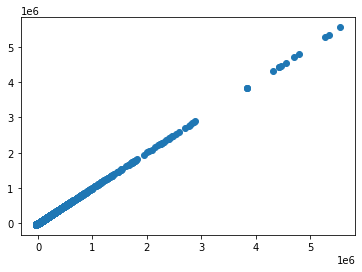

In [118]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0],x_pca[:,0])
#plt.xlabel
#plt.ylabel

In [119]:
print('check_pca', (x_train[:10,:]))

check_pca [[1721385]
 [ 306712]
 [  19500]
 [   9504]
 [   3648]
 [    883]
 [   2217]
 [  17833]
 [    995]
 [     29]]


In [162]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import utils

In [163]:
y = combined_data['len_title']
x = combined_data['desc_len']

In [170]:
rf_model = RandomForestClassifier( )

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_grid = GridSearchCV(estimator= rf_Model, param_grid = param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 21.6min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 35.7min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed: 61.1min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
################################################################################################################

In [ ]:
!apt install libkrb5-dev
!wget https://www.apache.org/dyn/closer.lua/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz #https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 37 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,385 kB]
Hit:12 http://ppa.launchpad.net/cra

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


In [ ]:
#!fusermount -u drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')#/MyDrive/combined_data/combined_data.csv')

Mounted at /content/gdrive


In [ ]:
train_sdf = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/MyDrive/combined_data/combined_data.csv')

In [ ]:
#!mkdir -p /content/drive

In [ ]:
#root_dir = "/content/gdrive/My Drive/"

In [ ]:
#base_dir = root_dir + 'combined_data/combined_data.csv'

In [ ]:
train_sdf.show()

+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+
|_c0|video_id|trending_date|channel_title|category|category_id|comments_disabled|ratings_disabled|video_error_or_removed|description|Country|             label|         likes_log|      dislikes_log|       comment_log|len_title|desc_len|num_tags|publsh_time|publish_date|publish_weekday|
+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+
|  0|   39758|           13|           13|       8|         10|            false|           false|                 false|      11282|      

In [ ]:
train_sdf.printSchema

<bound method DataFrame.printSchema of DataFrame[_c0: int, video_id: int, trending_date: int, channel_title: int, category: int, category_id: int, comments_disabled: boolean, ratings_disabled: boolean, video_error_or_removed: boolean, description: int, Country: int, label: double, likes_log: double, dislikes_log: double, comment_log: double, len_title: int, desc_len: int, num_tags: int, publsh_time: int, publish_date: int, publish_weekday: int]>

In [ ]:
train_sdf.dtypes

[('_c0', 'int'),
 ('video_id', 'int'),
 ('trending_date', 'int'),
 ('channel_title', 'int'),
 ('category', 'int'),
 ('category_id', 'int'),
 ('comments_disabled', 'boolean'),
 ('ratings_disabled', 'boolean'),
 ('video_error_or_removed', 'boolean'),
 ('description', 'int'),
 ('Country', 'int'),
 ('label', 'double'),
 ('likes_log', 'double'),
 ('dislikes_log', 'double'),
 ('comment_log', 'double'),
 ('len_title', 'int'),
 ('desc_len', 'int'),
 ('num_tags', 'int'),
 ('publsh_time', 'int'),
 ('publish_date', 'int'),
 ('publish_weekday', 'int')]

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
#assembler = VectorAssembler(inputCols=[x for x in train_sdf.columns],outputCol='features')

In [ ]:
train_sdf.columns

['_c0',
 'video_id',
 'trending_date',
 'channel_title',
 'category',
 'category_id',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'Country',
 'label',
 'likes_log',
 'dislikes_log',
 'comment_log',
 'len_title',
 'desc_len',
 'num_tags',
 'publsh_time',
 'publish_date',
 'publish_weekday']

In [ ]:
all_columns = train_sdf.columns

In [ ]:
all_columns

['_c0',
 'video_id',
 'trending_date',
 'channel_title',
 'category',
 'category_id',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'Country',
 'label',
 'likes_log',
 'dislikes_log',
 'comment_log',
 'len_title',
 'desc_len',
 'num_tags',
 'publsh_time',
 'publish_date',
 'publish_weekday']

In [ ]:
drop_columns = ['video_id','category_id','video_error_or_removed','publish_weekday','ratings_disabled','comments_disabled']

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

In [ ]:
assembler = VectorAssembler(inputCols=[x for x in columns_to_use],outputCol='features')

In [ ]:
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_5abf55e602cf\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_5abf55e602cf\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_5abf55e602cf\', name=\'outputCol\', doc=\'output column name.\')]', ['_c0', 'trending_date', 'channel_title', 'category', 'description', 'Country', 'label', 'likes_log', 'dislikes_log', 'comment_log', 'len_title', 'desc_len', 'num_tags', 'publsh_time', 'publish_date'])


In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pipeline = Pipeline(stages=[assembler])
model = pipeline.fit(assembler)

In [ ]:
modified_data_sdf = model.transform(train_sdf)

In [ ]:
pipeline_stat = pd.DataFrame(modified_data_sdf.take(100), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['_c0', 'video_id', 'trending_date', 'channel_title', 'category',
       'category_id', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country', 'label',
       'likes_log', 'dislikes_log', 'comment_log', 'len_title',
       'desc_len', 'num_tags', 'publsh_time', 'publish_date',
       'publish_weekday', 'features'], dtype=object), 15)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sdf,test_sdf = train_test_split(pipeline_stat,test_size=0.2,random_state=42)

In [ ]:
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (_c0                       80
video_id                  80
trending_date             80
channel_title             80
category                  80
category_id               80
comments_disabled         80
ratings_disabled          80
video_error_or_removed    80
description               80
Country                   80
label                     80
likes_log                 80
dislikes_log              80
comment_log               80
len_title                 80
desc_len                  80
num_tags                  80
publsh_time               80
publish_date              80
publish_weekday           80
features                  80
dtype: int64, _c0                       20
video_id                  20
trending_date             20
channel_title             20
category                  20
category_id               20
comments_disabled         20
ratings_disabled          20
video_error_or_removed    20
description               20
Country                   20
label           

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(featuresCol = 'features',labelCol='label')# maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [ ]:
lr_model=lr.fit(modified_data_sdf)

In [ ]:
trainingSum = lr_model.summary

In [ ]:
print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)

RMSE: 0.000000
r2: 1.000000


In [ ]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [5.973953801755529e-12,-1.4165015390774797e-11,-1.4165015390774797e-11,4.919172098391961e-09,-6.501797807963683e-13,-4.444775040879883e-09,1.0000000216831344,3.734792239677184e-08,-6.172964568571448e-08,-5.081786343427601e-09,8.575082716367599e-10,3.850171997779516e-12,2.1044713350870039e-10,-1.9322792586903715e-12,-1.0875819663069673e-09]
Intercept: -1.2538916826225825e-07


In [ ]:
modified_data_sdf.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|               _c0|          video_id|     trending_date|     channel_title|          category|       category_id|       description|           Country|             label|         likes_log|      dislikes_log|       comment_log|         len_title|         desc_len|          num_tags|       publsh_time|      publish_date|   publish_weekday|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----

In [ ]:
predictions = lr_model.transform(modified_data_sdf)

In [ ]:
predictions.select("prediction","label","features").show()

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|16.658008786885038| 16.65800889801732|[0.0,13.0,13.0,8....|
|13.830056178203343| 13.83005625452622|[1.0,13.0,13.0,1....|
|14.975981152512812| 14.97598121687207|[2.0,13.0,13.0,1....|
|14.555459677691882|14.555459737125451|[3.0,13.0,13.0,3....|
|17.327760896711915| 17.32776091246296|[4.0,13.0,13.0,8....|
|14.085308653653746|14.085308661317494|[5.0,13.0,13.0,9....|
|14.910096630933092|14.910096752782383|[6.0,13.0,13.0,1....|
|13.525659352672962|13.525659468227653|[7.0,13.0,13.0,11...|
|15.314595060452977|15.314595066548549|[8.0,13.0,13.0,3....|
|13.132634346077952|13.132634448893928|[9.0,13.0,13.0,11...|
| 15.43850218349468|  15.4385022021874|[10.0,13.0,13.0,8...|
| 14.96393630299864|14.963936296590095|[11.0,13.0,13.0,6...|
| 11.97550154446382|11.975501578387167|[12.0,13.0,13.0,4...|
|15.559263788496835|15.5

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="label",metricName="r2")

In [ ]:
lr_evaluator

RegressionEvaluator_e00d6ae0b587

In [ ]:
test_rmse_orig = print(lr_evaluator.evaluate(predictions))

0.9999999999999984


In [ ]:
test_result = lr_model.evaluate(modified_data_sdf)
print("RMSE on test data = %g" % test_result.rootMeanSquaredError)

RMSE on test data = 7.59379e-08


In [ ]:
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

result_lr_test [None, 0     16.658009
1     13.830056
2     14.975981
3     14.555460
4     17.327761
5     14.085309
6     14.910097
7     13.525659
8     15.314595
9     13.132634
10    15.438502
11    14.963936
12    11.975502
13    15.559264
14    13.775467
15    14.241575
16    13.231906
17    14.218457
18    12.639701
19    13.907477
20    13.614291
21    12.745978
22    15.177831
23    15.251742
24    12.823494
25    13.389943
26    11.432594
27    12.092053
28    13.280095
29    11.667165
30    15.095725
31    13.737790
32    11.726253
33    12.207397
34    13.488487
35    12.113579
36    13.170437
37    14.666064
38    10.499904
39     8.212026
40    12.564558
41    14.308482
42    13.036729
43    12.059433
44    10.274810
45    15.107885
46    16.175267
47    12.499160
48    11.858315
49    12.367273
Name: prediction, dtype: float64, 0     16.658009
1     13.830056
2     14.975981
3     14.555460
4     17.327761
5     14.085309
6     14.910097
7     13.525659
8     15.314595


In [ ]:
lr = LinearRegression(featuresCol = 'features',labelCol='label', maxIter=10, regParam=0.0, elasticNetParam=1.0)

In [ ]:
lr_model=lr.fit(modified_data_sdf)

In [ ]:
l1_predictions = lr_model.transform(modified_data_sdf)

In [ ]:
l1_predictions.select("prediction","label","features").show()

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
| 16.63700614092837| 16.65800889801732|[0.0,13.0,13.0,8....|
|  13.8066711139494| 13.83005625452622|[1.0,13.0,13.0,1....|
|14.984062547649849| 14.97598121687207|[2.0,13.0,13.0,1....|
|14.526082076359401|14.555459737125451|[3.0,13.0,13.0,3....|
|17.328268897631354| 17.32776091246296|[4.0,13.0,13.0,8....|
|14.118472895762475|14.085308661317494|[5.0,13.0,13.0,9....|
| 14.92609770109241|14.910096752782383|[6.0,13.0,13.0,1....|
|13.515184958000278|13.525659468227653|[7.0,13.0,13.0,11...|
| 15.30706634460922|15.314595066548549|[8.0,13.0,13.0,3....|
|13.131975805186332|13.132634448893928|[9.0,13.0,13.0,11...|
|15.445311902632888|  15.4385022021874|[10.0,13.0,13.0,8...|
|15.006631616500696|14.963936296590095|[11.0,13.0,13.0,6...|
|11.983907941686729|11.975501578387167|[12.0,13.0,13.0,4...|
|15.595720276778957|15.5

In [ ]:
lr = LinearRegression(featuresCol = 'features',labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.0)

In [ ]:
lr_model=lr.fit(modified_data_sdf)

In [ ]:
l2_predictions = lr_model.transform(modified_data_sdf)

In [ ]:
l2_predictions.select("prediction","label","features").show()

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
| 16.43903750126866| 16.65800889801732|[0.0,13.0,13.0,8....|
|13.912221083715888| 13.83005625452622|[1.0,13.0,13.0,1....|
|14.824060093624087| 14.97598121687207|[2.0,13.0,13.0,1....|
|14.379187344906839|14.555459737125451|[3.0,13.0,13.0,3....|
| 16.82116133043769| 17.32776091246296|[4.0,13.0,13.0,8....|
|14.354156592691004|14.085308661317494|[5.0,13.0,13.0,9....|
|14.913553807886004|14.910096752782383|[6.0,13.0,13.0,1....|
|13.750526687905053|13.525659468227653|[7.0,13.0,13.0,11...|
|15.116222109406365|15.314595066548549|[8.0,13.0,13.0,3....|
|13.041383246358578|13.132634448893928|[9.0,13.0,13.0,11...|
|15.339538592266438|  15.4385022021874|[10.0,13.0,13.0,8...|
| 14.51998758236117|14.963936296590095|[11.0,13.0,13.0,6...|
|11.391510470275843|11.975501578387167|[12.0,13.0,13.0,4...|
|15.272288897047664|15.5

In [ ]:
elastic_net_predictions = LinearRegression(featuresCol = 'features',labelCol='label', maxIter=20, regParam=0.0, elasticNetParam=0.8)

In [ ]:
lr_model=lr.fit(modified_data_sdf)

In [ ]:
elastic_net_predictions = lr_model.transform(modified_data_sdf)

In [ ]:
elastic_net_predictions.select("prediction","label","features").show()

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
| 16.43903750126866| 16.65800889801732|[0.0,13.0,13.0,8....|
|13.912221083715888| 13.83005625452622|[1.0,13.0,13.0,1....|
|14.824060093624087| 14.97598121687207|[2.0,13.0,13.0,1....|
|14.379187344906839|14.555459737125451|[3.0,13.0,13.0,3....|
| 16.82116133043769| 17.32776091246296|[4.0,13.0,13.0,8....|
|14.354156592691004|14.085308661317494|[5.0,13.0,13.0,9....|
|14.913553807886004|14.910096752782383|[6.0,13.0,13.0,1....|
|13.750526687905053|13.525659468227653|[7.0,13.0,13.0,11...|
|15.116222109406365|15.314595066548549|[8.0,13.0,13.0,3....|
|13.041383246358578|13.132634448893928|[9.0,13.0,13.0,11...|
|15.339538592266438|  15.4385022021874|[10.0,13.0,13.0,8...|
| 14.51998758236117|14.963936296590095|[11.0,13.0,13.0,6...|
|11.391510470275843|11.975501578387167|[12.0,13.0,13.0,4...|
|15.272288897047664|15.5

In [ ]:
test_rmse_l1 = (lr_evaluator.evaluate(l1_predictions))
test_rmse_l2 = (lr_evaluator.evaluate(l2_predictions))
test_rmse_elastic = (lr_evaluator.evaluate(elastic_net_predictions))

In [ ]:
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [0.9998258295589517, 0.9703288831754919, 0.9703288831754919]


In [ ]:
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
(trainingData, testData) = modified_data_sdf.randomSplit([0.8, 0.2])

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_model =rf.fit(trainingData)

In [ ]:
rf_model

RandomForestRegressionModel: uid=RandomForestRegressor_0613ae869230, numTrees=20, numFeatures=15

In [ ]:
rf_train_predictions = rf_model.transform(trainingData)

In [ ]:
rf_test_predictions = rf_model.transform(testData)

In [ ]:
rf_test_predictions.select("prediction","label","features").show()

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|12.881526658024962|12.977850768461046|[1.0,13.0,13.0,3....|
| 16.47862093634339| 17.32776091246296|[4.0,13.0,13.0,8....|
|14.857719803831277|14.910096752782383|[6.0,13.0,13.0,1....|
|14.779351106163684| 14.66606397042926|[8.0,13.0,13.0,3....|
|15.568953872361842|15.314595066548549|[8.0,13.0,13.0,3....|
|11.725246921779565|12.591559510922673|[10.0,13.0,13.0,3...|
| 11.11788066924531|10.920781320026649|[14.0,13.0,13.0,1...|
|14.307330279455474|14.241574708172283|[15.0,13.0,13.0,1...|
|12.588709243126077| 12.45039043207579|[18.0,13.0,13.0,5...|
|13.474078583106953| 13.38994324769186|[19.0,13.0,13.0,3...|
|12.724205071853282|12.745978316175949|[21.0,13.0,13.0,3...|
|11.653217967446409|10.803425300247511|[26.0,13.0,13.0,9...|
|12.547934491253036|12.207396768492305|[35.0,13.0,13.0,9...|
| 12.04529336626689|11.9

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

In [ ]:
train_rmse_rf = print("Train_rmse = ",evaluator.evaluate(rf_train_predictions))
rmse_rf = print("Test_rmse = ",evaluator.evaluate(rf_test_predictions))

Train_rmse =  0.3432994701351548
Test_rmse =  0.34215637623114464


In [ ]:
rf_test_predictions.show()

+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+--------------------+------------------+
|_c0|video_id|trending_date|channel_title|category|category_id|comments_disabled|ratings_disabled|video_error_or_removed|description|Country|             label|         likes_log|      dislikes_log|       comment_log|len_title|desc_len|num_tags|publsh_time|publish_date|publish_weekday|            features|        prediction|
+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+--------------------+------------------+
|  1|   27859|     

In [ ]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
print(" R Squared=", evaluator.evaluate(predictions))

 R Squared= 0.9999999999999984


In [ ]:
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark', answer)

check_rf_spark [None, 0     16.658009
1     13.830056
2     14.975981
3     14.555460
4     17.327761
5     14.085309
6     14.910097
7     13.525659
8     15.314595
9     13.132634
10    15.438502
11    14.963936
12    11.975502
13    15.559264
14    13.775467
15    14.241575
16    13.231906
17    14.218457
18    12.639701
19    13.907477
20    13.614291
21    12.745978
22    15.177831
23    15.251742
24    12.823494
25    13.389943
26    11.432594
27    12.092053
28    13.280095
29    11.667165
30    15.095725
31    13.737790
32    11.726253
33    12.207397
34    13.488487
35    12.113579
36    13.170437
37    14.666064
38    10.499904
39     8.212026
40    12.564558
41    14.308482
42    13.036729
43    12.059433
44    10.274810
45    15.107885
46    16.175267
47    12.499160
48    11.858315
49    12.367273
Name: prediction, dtype: float64, 0     16.658009
1     13.830056
2     14.975981
3     14.555460
4     17.327761
5     14.085309
6     14.910097
7     13.525659
8     15.314595


In [ ]:
pca = PCA(k=5 , inputCol="features", outputCol="pca")
pca_of_model = pca.fit(trainingData)
pca_transformed = pca_of_model.transform(trainingData)

In [ ]:
pca_of_model

PCAModel: uid=PCA_30da512b7a9b, k=5

In [ ]:
pca_train_predictions = pca_of_model.transform(trainingData)

In [ ]:
pca_test_predictions = pca_of_model.transform(testData)

In [ ]:
pca_of_model.transform(trainingData).collect()[0].pca

DenseVector([-10488.0424, 1064.6331, 17470.5129, 1285.3961, 44.7679])

In [ ]:
pca_of_model.explainedVariance

DenseVector([0.4761, 0.3652, 0.1565, 0.0021, 0.0001])

In [ ]:
results = pca_transformed.select("pca")

In [ ]:
results.show()

+--------------------+
|                 pca|
+--------------------+
|[-10488.042367850...|
|[-11703.336592175...|
|[-30273.467054351...|
|[-38768.459426527...|
|[-37526.292777745...|
|[-25264.065631359...|
|[-15849.198205191...|
|[-30788.890302888...|
|[-44537.398939067...|
|[-9049.7374945238...|
|[-6473.2771941696...|
|[-30129.861857690...|
|[-9734.1526516209...|
|[-3132.0986628831...|
|[-31142.111765363...|
|[-39252.175592266...|
|[-32316.249012007...|
|[-36750.455354072...|
|[-33763.464475759...|
|[-13694.376861227...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

In [ ]:
trainingData.columns

['_c0',
 'video_id',
 'trending_date',
 'channel_title',
 'category',
 'category_id',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'Country',
 'label',
 'likes_log',
 'dislikes_log',
 'comment_log',
 'len_title',
 'desc_len',
 'num_tags',
 'publsh_time',
 'publish_date',
 'publish_weekday',
 'features']

In [ ]:
pca_test_predictions.show()

+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+--------------------+--------------------+
|_c0|video_id|trending_date|channel_title|category|category_id|comments_disabled|ratings_disabled|video_error_or_removed|description|Country|             label|         likes_log|      dislikes_log|       comment_log|len_title|desc_len|num_tags|publsh_time|publish_date|publish_weekday|            features|                 pca|
+---+--------+-------------+-------------+--------+-----------+-----------------+----------------+----------------------+-----------+-------+------------------+------------------+------------------+------------------+---------+--------+--------+-----------+------------+---------------+--------------------+--------------------+
|  0|   22451

In [ ]:
pca_test_predictions.select("pca","label","features").show()

+--------------------+------------------+--------------------+
|                 pca|             label|            features|
+--------------------+------------------+--------------------+
|[-10488.042367850...|12.267652105461218|[0.0,13.0,13.0,3....|
|[-11703.336592175...| 16.65800889801732|[0.0,13.0,13.0,8....|
|[-30273.467054351...| 13.83005625452622|[1.0,13.0,13.0,1....|
|[-38768.459426527...| 14.97598121687207|[2.0,13.0,13.0,1....|
|[-37526.292777745...|13.086018844077508|[2.0,13.0,13.0,1....|
|[-25264.065631359...|13.737790068520269|[3.0,13.0,13.0,5....|
|[-15849.198205191...|14.555459737125451|[3.0,13.0,13.0,3....|
|[-30788.890302888...|11.861439196628254|[4.0,13.0,13.0,15...|
|[-44537.398939067...|14.085308661317494|[5.0,13.0,13.0,9....|
|[-9049.7374945238...|11.858314967191795|[5.0,13.0,13.0,1....|
|[-6473.2771941696...|12.142360449558572|[6.0,13.0,13.0,3....|
|[-30129.861857690...|13.525659468227653|[7.0,13.0,13.0,11...|
|[-9734.1526516209...| 11.41918605086728|[7.0,13.0,13.0